In [3]:
import os
from codes.bb import *
import pandas as pd
import networkx as nx
import plotly.express as px
import matplotlib.pyplot as plt

### Plot NMR Graph

In [13]:
def plot_graph(G, fnmr, savefig=False):
    print(fnmr)
    pos = nx.spring_layout(G)    
    node_color = ['y' if ':' in node else 'r' for node in G.nodes()]
    node_size = [800 if ':' in node else 300 for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, 
        node_size=node_size, 
        node_shape='o', 
        node_color=node_color)
    nx.draw_networkx_labels(G, pos, font_color='k', font_size=8)
    nx.draw_networkx_edges(G, pos)
    if savefig:
        plt.savefig(fnmr.replace('.nmr', '.pdf'), format='pdf')
    plt.show()

DATA_TEST/testRAND_0356.nmr


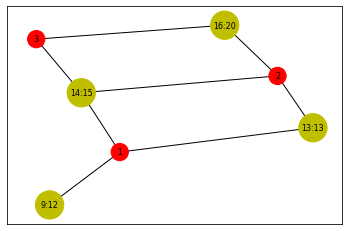

DATA_TEST/testRAND_0044.nmr


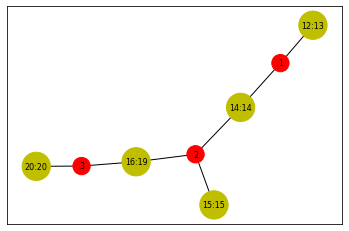

DATA_TEST/testRAND_0175.nmr


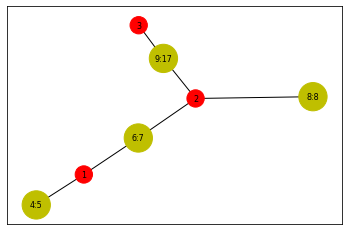

DATA_TEST/testRAND_0769.nmr


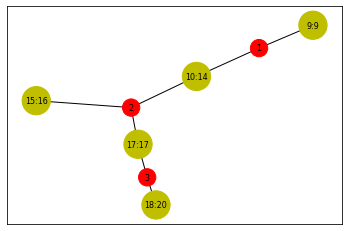

DATA_TEST/testRAND_0694.nmr


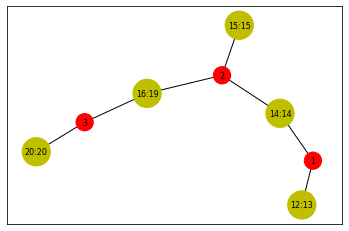

DATA_TEST/testRAND_0796.nmr


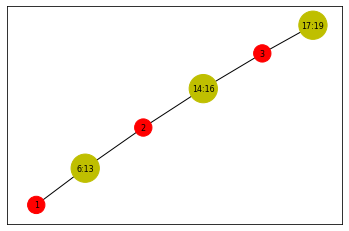

DATA_TEST/testRAND_0802.nmr


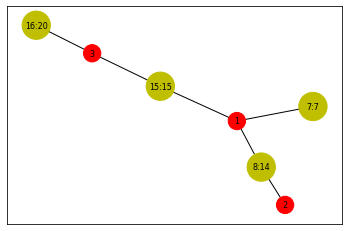

In [15]:
wdir = 'DATA_TEST'
for fn in os.listdir(wdir):
    if not fn.startswith('testRAND') or not fn.endswith('.nmr'):
        continue
    fn = os.path.join(wdir, fn)
    nmr = NMR(fn)
    E, S = nmr.E, nmr.S
    G = nmr.ordering_graph
    plot_graph(G, fn, True)

In [ ]:
order_cost([3,2,1],E, S)

### Read LOG Files

In [ ]:
WDIR = ['DATA_EPSD_00_DMAX_50', 'DATA_EPSD_00_DMAX_60']
df = []
for wdir in WDIR:
    dmax = int(wdir.split('_')[-1])
    for flog in sorted(os.listdir(wdir)):
        if not flog.endswith('.log'):
            continue
        pid = flog.replace('.log','')
        flog = os.path.join(wdir, flog)
        # check if the problem was pickled        
        df_log = {'pid': pid, 'dmax':dmax}
        with open(flog, 'r') as fid:
            for row in fid:
                row = row.replace(':','').replace('\n','').split(' ')
                field = row[1]
                if 'fnmr' in field:
                    value = row[-1]
                elif 'timeoutBB' in field:
                    value = int(row[-1])
                elif 'time' in field:
                    value = float(row[-1])
                else:
                    value = int(row[-1])
                df_log[field] = value
        df.append(df_log)
df = pd.DataFrame(df)
df['gapRL'] = (df['costSBBU'] - df['costRELAX']) / df['costRELAX']
df['gapBB'] = (df['costSBBU'] - df['costBB']) / df['costBB']
df['gapPT'] = (df['costSBBU'] - df['costPT']) / df['costPT']
C = {'costRELAX':'costRL', 'costSBBU':'costSB','timeSBBU':'timeSB','timeoutBB':'toutBB','timeoutPT':'toutPT'}
df.rename(columns=C, inplace=True)
df.drop(['fnmr'],axis=1,inplace=True)
fname = 'results.xlsx'
print('Save', fname)
df.to_excel(fname,index=False)
df.head()

In [ ]:
# time out cases
dfA = df[df['timeoutPT'] + df['timeoutBB'] >= 1]
dfA = dfA[['pid','dmax','costRELAX','costSBBU','costBB','costPT','gapRL','timeBB','timePT']]
dfA

In [ ]:
df.groupby(by=['pid','dmax']).mean()

In [ ]:
df50 = df[df['dmax']==50]
df60 = df[df['dmax']==60]